<a href="https://colab.research.google.com/github/JoysgitHub/AI-COLLAB/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

313/313 [==============================] - 16s 51ms/step - loss: 0.0481 - accuracy: 0.9865
Test accuracy: 0.9865
313/313 [==============================] - 19s 60ms/step
Precision: 98.64
Recall: 98.65
F1-score: 98.65
Execution time: 444.53 seconds
Confusion Matrix:


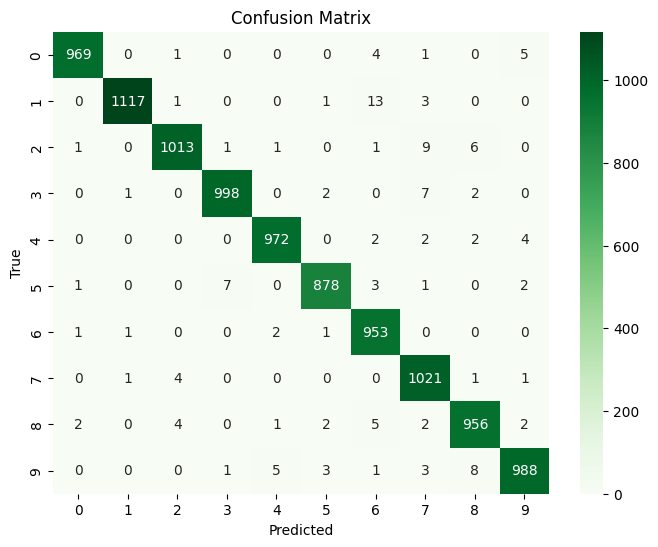

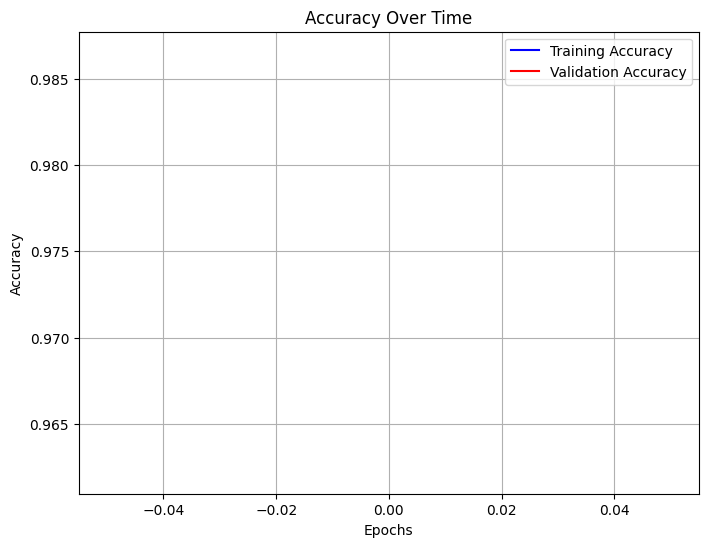

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import time  # Measure execution time
import seaborn as sns

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Add a channel dimension, and normalize pixel values to be between 0 and 1
train_images = np.expand_dims(train_images, axis=-1) / 255.0
test_images = np.expand_dims(test_images, axis=-1) / 255.0

start_time = time.time()
# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

# Define the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

# Add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes in MNIST


# Learning rate scheduling
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_images, train_labels, epochs= 5,
                    validation_data=(test_images, test_labels))

# End timing
end_time = time.time()  # Record the end time of model evaluation
execution_time = end_time - start_time  # Calculate the total execution time


# Evaluate on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

# Calculate precision, recall, and F1-score
y_pred1 = model.predict(test_images)
y_pred = np.argmax(y_pred1, axis=1)
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
f1 = f1_score(test_labels, y_pred, average='macro')
print(f"Precision: {precision * 100:.2f} %")
print(f"Recall: {recall * 100:.2f} %")
print(f"F1-score: {f1 * 100:.2f} %")

print(f"Execution time: {execution_time:.2f} seconds")  # Print total execution time


# Create and visualize the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)

# Create and visualize the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#print(conf_matrix)

# Plot accuracy over time
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.grid(True)
plt.show()